In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Custom Function to view images better
def show_pic(img):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img)

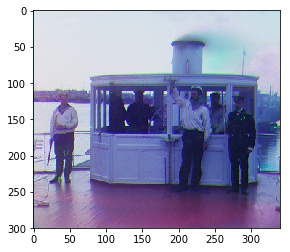

In [3]:
img = cv2.imread('Task1Output2.jpg',1)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(img)

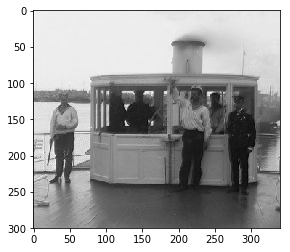

In [4]:
#Color and Contrast Adjustments
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

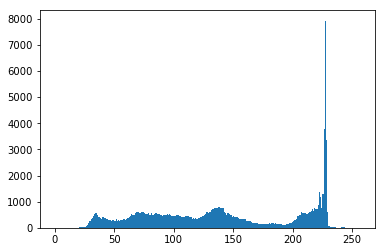

In [5]:
#Calculate Histogram
plt.hist(gray_img.ravel(),256,[0,256]); 
plt.show()

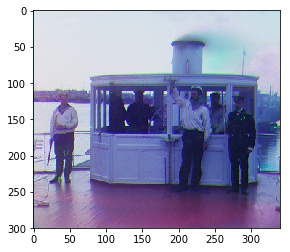

In [6]:
gamma = 1.0
gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
plt.imshow(gamma_corrected)

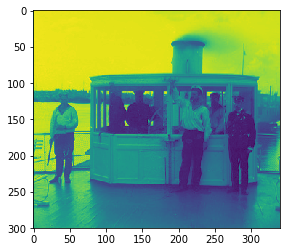

In [7]:
#Contrast Stretching
a = 0
b = 255
Or = img.copy()
Or = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
c = np.min(Or) #Finding the minimum pixel
d = np.max(Or) #Finding the maximum pixel
#print(c,d)
#Formula to achieve contrast stretching
Tr = (Or - c) * (255/(d-c))
plt.imshow(Tr,vmin=0,vmax=255)

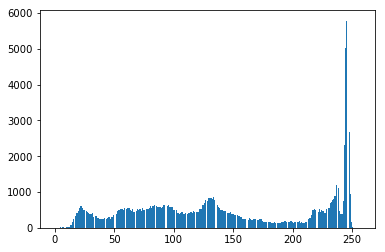

In [8]:
#Calculate Histogram
plt.hist(Tr.ravel(),256,[0,256]); 
plt.show()

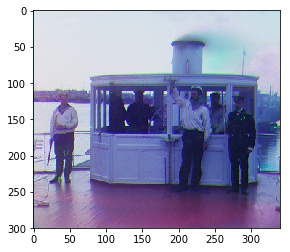

In [9]:
#This is achieved using normalise to retain the RGB color space
#The former is good for Grayscale
image = cv2.normalize(img, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)
plt.imshow(image)

In [27]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
cv2.imwrite('Task3Output1.jpeg',image)

True

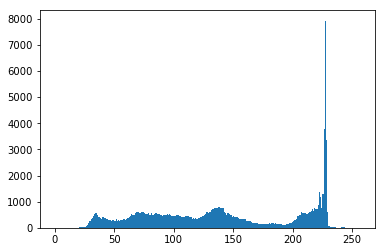

In [10]:
new_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.hist(new_gray.ravel(),256,[0,256]); 
plt.show()

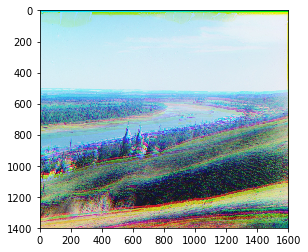

In [11]:
high_img = cv2.imread('Task2Output2.jpg',1)
high_display = cv2.cvtColor(high_img, cv2.COLOR_BGR2RGB)
plt.imshow(high_display)

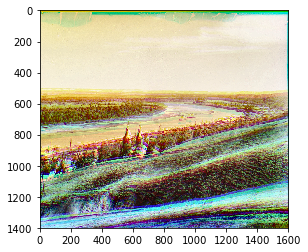

In [12]:
#CLAHE
lab = cv2.cvtColor(high_img, cv2.COLOR_BGR2LAB)
lab_planes = cv2.split(lab)
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
lab_planes[0] = clahe.apply(lab_planes[0])
lab = cv2.merge(lab_planes)
rgb = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
plt.imshow(rgb)

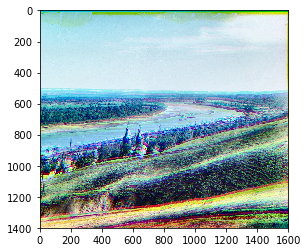

In [13]:
new_display = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)
plt.imshow(new_display)

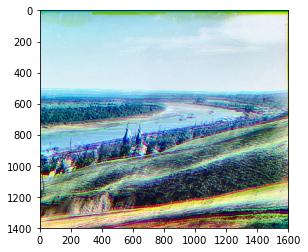

In [14]:
#Gaussian Blur of increased kernel size produces a similar result
blur = cv2.GaussianBlur(new_display,(11,11),0)
plt.imshow(blur)

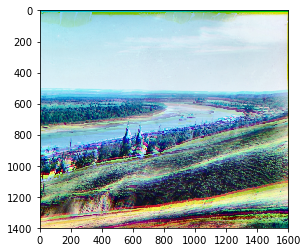

In [15]:
#Bilateral Filtering also produces a smilar result
blur = cv2.bilateralFilter(new_display,9,75,75)
plt.imshow(blur)

In [16]:
#rgb = cv2.cvtColor(lab, cv2.COLOR_RGB2BGR)
cv2.imwrite('new.jpg',rgb)

True

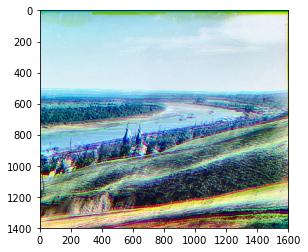

In [17]:
#Edge Detection and Removal using Gaussian Blur and Canny Edge Detection
blur = cv2.GaussianBlur(new_display,(11,11),0)
plt.imshow(blur)